<a href="https://colab.research.google.com/github/srikanth20k/EDA-data-analysis/blob/main/EDA_with_titanic_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#Table of contents

#Table of contents
  1. Objective
  2.importing packages & Collection Data
  3.Data Profiling & Preprocessing

    3.1 Pre Profiling

    3.2 Examin the Data

    3.3 Preprocessing

    3.4 Post Profiling

  4. Analysis Through Data Visulization

     4.1 what is Total cost os Survivals and Victims ?

     4.2 which gender as more survival rate ?

     4.3 what is survival rate based on person type(male,female,child) ?

     4.4 did economy class had an impact on survival?

     4.5 what is survival probaility based on embarkment of passengers ?

     4.6 How is fare distributed for the passengers ?

     4.7 what was average fare by pclass & embark location ?

     4.8 segement age in bins with size of 20 also correlate age with survival ?

     4.9 did solo traveller has less chances of survival ?

     4.10 how did total family size affected survival count ?

     4.11 how can you correlate pclass/age/fare with survival rate ?

     4.12 which features has most impact on survival rate ?
     
  5. conclusion















## Data  Description
* The dataset consists of the information about people boarding the famous RMS Titanic .various variables present in the dataset includes data of age,sex,fare,ticket  et
* The dataset comprises of **891 observations of 12 columns**.Below is a details showing the names of all the columns and their description

| Column Name | Description |
    |---|---|
    | Passengerid | Passenger Identity|
    | Survived    | Whether passenger  survived or not |
    | Pclass      | Class of ticket|
    | Name        | Name of passenger|
    | Sex         | Sex of passenger |
    | Age         | Age of passenger |
    | SibSb       | No of sibling and/or spouse travelling with passenger|
    | Parch       | No of parents and/or children traveling  with passenger|
    | Ticket      | Ticket number|
    | Fare        | Price of ticket|
    | Cabin       | Cabin numbe|






## 2.1 importing the packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas_profiling
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

sns.set()

| Header 1 | Header 2 | Header 3 |
   |---|---|---|
   | Row 1, Cell 1 | Row 1, Cell 2 | Row 1, Cell 3 |
   | Row 2, Cell 1 | Row 2, Cell 2 | Row 2, Cell 3 |

## 2.2 importing the Dataset

In [4]:
data = pd.read_csv("https://raw.github.com/srikanth20k/EDA-data-analysis/main/Titanic-Dataset.csv")

## 3 Data Profiling

 ## 3.1 Pre Profiling

 *  By pandas profiling an **interactive HTML report** gets genertaed which contains the all information about the counts and type of each column, **coorelation between different column**s and  sample of datset
* It gives us visual interpretation of each column
* It gives us better understanding by disrtibution plots
* Grannular level analysis of each column

In [138]:
! pip install ydata-profiling
from ydata_profiling import ProfileReport
report = ProfileReport(data, title="Titanic Dataset Report", explorative=True)

In [139]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## .3.2 Examin the dataset

In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
print(f"no of rows : {data.shape[0]}")
print(f"no of columns : {data.shape[1]}")

no of rows : 891
no of columns : 12


In [8]:
data.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [9]:
data.tail(3)

PassengerId  Survived  Pclass                                      Name  \
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

        Sex   Age  SibSp  Parch      Ticket   Fare Cabin Embarked  
888  female   NaN      1      2  W./C. 6607  23.45   NaN        S  
889    male  26.0      0      0      111369  30.00  C148        C  
890    male  32.0      0      0      370376   7.75   NaN        Q

In [10]:
data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

## Insights :
   1. Total samples are **891** or **40%** of the actual number of passengers on board the titanic **2,224**
   2. Survived is categorical feature with o or 1 Values
   3. Around **38%** samples survived representative of the actual survival rate **32%**
   4. Fare varied significately with few passenger paying as g=high as **$512**
   5. Few elder passengers with in age range **65-80**

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


* info()
  1. it gives the type of data in series or data frame **class 'pandas.core.frame.DataFrame**
  2. it gives no of columns in dataframe **Data columns (total 12 columns)**
  3. And it gives the column, Non_Null Count,Dtype of each column in dataframe
  4. it also gives the  **memory usage: 83.7+ KB**

In [12]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [13]:
missing_=(data.isnull().sum())/(len(data))*100
missing_

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [14]:
mising_data = pd.concat([data.isnull().sum(),missing_],axis=1,keys=['Total','Missing%'])
mising_data

Total   Missing%
PassengerId      0   0.000000
Survived         0   0.000000
Pclass           0   0.000000
Name             0   0.000000
Sex              0   0.000000
Age            177  19.865320
SibSp            0   0.000000
Parch            0   0.000000
Ticket           0   0.000000
Fare             0   0.000000
Cabin          687  77.104377
Embarked         2   0.224467

From the above output we can see that **Age**  and **Cabin**  columns as **maximum null values** .we will how to dell with them

## 3.3 Preprocessing
* Dealing with missing  values
  * Droping/Replacing missing entries in the **Embarked**
  * Replacing the missing values of **Age** with median values
  * Dropping the column **'Cabin'** as has too many missimg values
  * Replacing 0 values of fare with the median  values

### filling the missing values with median of age

In [16]:
median_age = data.Age.median()  # calculating the median of the age is 28.0
data.Age.fillna(median_age,inplace=True) # filling the null will median_ age in Age column

### filling the missing values with mode of  Embarked

In [17]:
data.Embarked = data.Embarked.fillna(data.Embarked.mode()[0])

In [18]:
data.Embarked.isna().sum()

0

droping the cabin data column 77% of missing values

In [19]:
data.drop('Cabin',axis=1,inplace=True)

In [20]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [21]:
data.Fare=data.Fare.replace(0,data.Fare.median())

In [22]:
data['family_size']=data['SibSp']+data['Parch']+1

In [23]:
data[['family_size','SibSp','Parch']]

family_size  SibSp  Parch
0              2      1      0
1              2      1      0
2              1      0      0
3              2      1      0
4              1      0      0
..           ...    ...    ...
886            1      0      0
887            1      0      0
888            4      1      2
889            1      0      0
890            1      0      0

[891 rows x 3 columns]

In [25]:
data['Genderclass']=data.apply(lambda x:'child' if x['Age']<15 else x['Sex'],axis=1)

In [24]:
data[data.Age<15].head(3)

PassengerId  Survived  Pclass                                 Name  \
7             8         0       3       Palsson, Master. Gosta Leonard   
9            10         1       2  Nasser, Mrs. Nicholas (Adele Achem)   
10           11         1       3      Sandstrom, Miss. Marguerite Rut   

       Sex   Age  SibSp  Parch   Ticket     Fare Embarked  family_size  
7     male   2.0      3      1   349909  21.0750        S            5  
9   female  14.0      1      0   237736  30.0708        C            2  
10  female   4.0      1      1  PP 9549  16.7000        S            3

In [26]:
data[data.Age>15].head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Embarked  family_size Genderclass  
0      0         A/5 21171   7.2500        S            2        male  
1      0          PC 17599  71.2833        C            2      female  
2      0  STON/O2. 3101282   7.9250        S            1      female

### 3.4 post profiling

In [28]:
!pip install ydata-profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.9/390.9 kB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 80.6 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=3e9752e2143f7bec65c401022dbe1f77b8ac00001bf0cc7ed3bfbeb19cd00c96
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [29]:
import pandas_profiling
profile = pandas_profiling.ProfileReport(data)
profile.to_file("Titanic_report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

### 4. questions

### 4.1 what is Total cost of Survivals and Victims ?

In [30]:
px.histogram(data,x='Survived',
             color='Survived',
             title='Total cost of Survivals and Victims',
             text_auto=True,
             width=800,
             height=600)

* you can see the more people died than survived .To know the exact count

In [31]:
data.groupby('Survived')['Survived'].count()

Survived
0    549
1    342
Name: Survived, dtype: int64

### 4.2 which gender as more survival rate ?

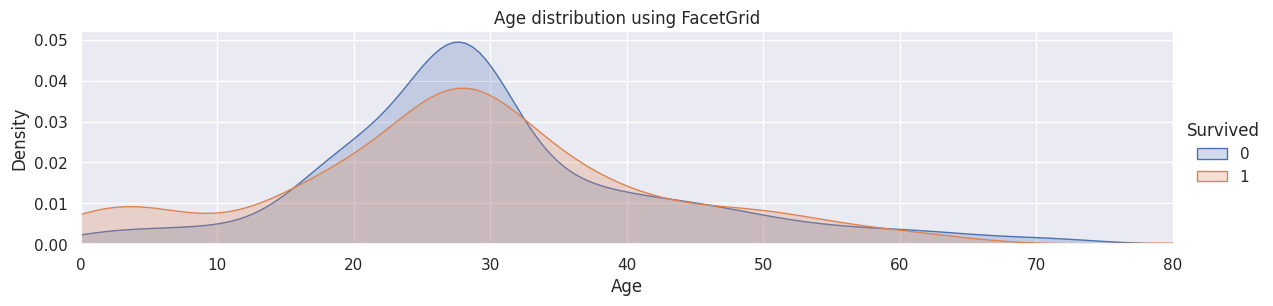

In [32]:
as_fig = sns.FacetGrid(data,hue='Survived',aspect=4)
as_fig.map(sns.kdeplot,'Age',shade=True)
oldest = data.Age.max()
as_fig.set(xlim=(0,oldest))
as_fig.add_legend()
plt.title('Age distribution using FacetGrid')
plt.show()

In [33]:
data.groupby(['Survived','Genderclass'])['Survived'].count()

Survived  Genderclass
0         child           33
          female          66
          male           450
1         child           45
          female         209
          male            88
Name: Survived, dtype: int64

## 4.3 what is survival rate based on person type(male,female,child) ?

In [34]:
print(" % of women survived : ", (data[data.Genderclass=='female']['Survived'].sum()/data[data.Genderclass=='female']['Survived'].count())*100)
print(" % of men survived : ", (data[data.Genderclass=='male']['Survived'].sum()/data[data.Genderclass=='male']['Survived'].count())*100)
print(" % of child survived :", (data[data.Genderclass=='child']['Survived'].sum()/data[data.Genderclass=='child']['Survived'].count())*100)

 % of women survived :  76.0
 % of men survived :  16.356877323420075
 % of child survived : 57.692307692307686


In [35]:
pd.crosstab([data.Genderclass,data.Survived],data.Pclass,margins=True).apply(lambda r: 100*r/len(data),axis=1).style.background_gradient(cmap='summer_r')

You can see how the percentage of males, females and children survived are varying depending on the passenger class they are in. Also, its quiet difficult to develop quick insights by looking only at numbers. Therefore we will explore doing the same with the help of plotting.

<Axes: xlabel='Pclass', ylabel='Survived'>

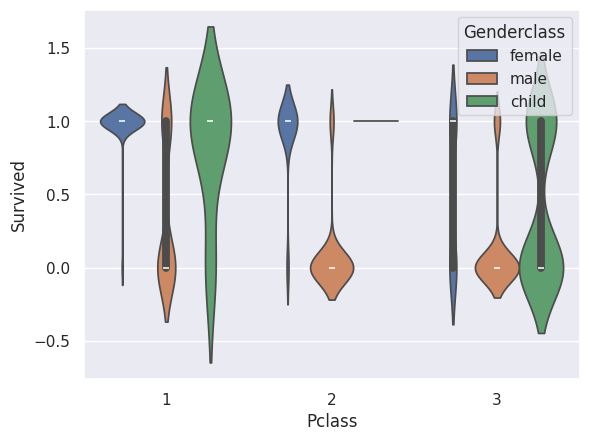

In [36]:
sns.violinplot(data=data,x='Pclass',y='Survived',hue='Genderclass')

Above is another beautiful way to see how the survival rate is varying with Passenger class.

 * Pclass 3 have more people who died, and for Pclass 1 survival rate is more.
Drawing factorplot to look at the distribution of popluation with Pclass and GenderClass.

### 4.5 what is survival probaility based on embarkment of passengers ?

In [70]:
fig = px.histogram(x='Embarked',
                   data_frame=data,
                   color='Genderclass',
                   height=800,
                   width=1000,
                   title='survival probaility based on embarkment of passengers',
                   text_auto=True)
fig.update_traces(opacity=0.6)  # Apply opacity to the traces (bars)
fig.update_layout(barmode='overlay',  # Corrected typo: 'overley' to 'overlay'
                  xaxis_tickangle=0)
fig.show()

In [62]:
fig = px.histogram(x='Embarked',data_frame=data,color='Survived',height=800,width=1000,title='survival probaility based on embarkment of passengers',text_auto=True)
fig.update_layout(barmode='', xaxis_tickangle=0,)
fig.show()

1. Maximum___ number of people have __Southampton as port of embarkment.
2. Also observe people who boarded at Cherbourg, more people survived than died, and this is reverse for Queenstown.

 * Using factorplot and kind = 'point'

<Figure size 1000x1000 with 0 Axes>

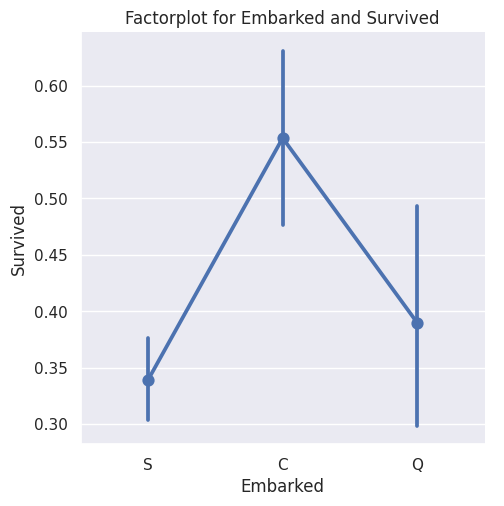

In [45]:
plt.figure(figsize=(10,10))
sns.catplot(x='Embarked', y='Survived', kind='point', data=data)  # Use catplot instead of factorplot
plt.title('Factorplot for Embarked and Survived')
plt.show()

In [48]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'family_size', 'Genderclass'],
      dtype='object')

##4.6  How is fare distributed for the passengers ?

In [128]:
import plotly.express as px
import seaborn as sns

# Create a histogram of the fare distribution using Plotly
# Changed 'fare' to 'Fare' to match the column name in the DataFrame
fig = px.histogram(data_frame=data,
    x="Fare", # Fixed: Changed 'fare' to 'Fare'
    nbins=12,
    title="Fare Distribution of Titanic Passengers",
    labels={"Fare": "Fare"},
    marginal="box",  # Adds a box plot on top
    opacity=0.7
)

# Customize layout
fig.update_layout(
    xaxis_title="Fare",
    yaxis_title="Frequency",
    title_font_size=16,
    template="plotly_white"
)

fig.show()

We have seen that 'Fare' mostly varies between 10 and 90. We will use this information to create bins.

Creating a new column named 'Fare_bin' based on 12 interval ranges in 'Fare' as 12 bins.

##4.7 what was average fare by pclass & embarked location ?

In [55]:

# Calculate average fare grouped by Pclass and Embark location
avg_fare_data = data.groupby(['Pclass', 'Embarked'], as_index=False)['Fare'].mean()

# Create a bar chart using Plotly Express
fig = px.bar(
    avg_fare_data,
    x="Pclass",
    y="Fare",
    color="Embarked",
    barmode="group",
    title="Average Fare by Pclass and Embark Location",
    labels={"pclass": "Passenger Class", "fare": "Average Fare", "embarked": "Embark Location"},
    text_auto=True
)

# Customize layout
fig.update_layout(
    xaxis=dict(tickmode="linear", tick0=1, dtick=1),
    template="plotly_white",
    title_font_size=16
)

# Show the chart
fig.show()


In [71]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'family_size', 'Genderclass'],
      dtype='object')

## 4.8 segement age in bins with size of 20 also correlate age with survival ?

In [106]:

age_survival = data.groupby(["Age", "Survived"]).size().reset_index(name="count")

# Create a bar chart correlating age bins with survival
fig = px.line(
    age_survival,
    x="Age",
    y="count",
    color="Survived",
    title="Survival Correlation by Age Segments (Bins of 20)",
    labels={"Age": "Age Bins", "count": "Passenger Count", "survived": "Survived"},
    # text_auto=True,
    # barmode="group"
)
# Get unique age values from the DataFrame to set tick values
age_values = sorted(data['Age'].unique())

# Customize layout, using age_values instead of Age
fig.update_layout(
    xaxis=dict(tickmode="array", tickvals=age_values, ticktext=[str(age) for age in age_values]),
    template="plotly_white",
    title_font_size=16
)

fig.show()

##4.9 did solo traveller has less chances of survival ?

In [114]:
# Create a bar chart to visualize survival based on solo travel status
data["solo_traveler"] = (data["SibSp"] == 0) & (data["Parch"] == 0)

fig = px.histogram(
    solo_survival,
    x="solo_traveler",
    y="count",
    color="Survived",  # Changed to 'Survived'
    title="Survival Rates of Solo Travelers vs Non-Solo Travelers",
    labels={"solo_traveler": "Solo Traveler", "count": "Passenger Count", "survived": "Survived"},
    text_auto=True,
    barmode="group"
)

# Customize layout
fig.update_layout(
    xaxis=dict(tickmode="array", tickvals=[0, 1], ticktext=["Non-Solo Traveler", "Solo Traveler"]),
    template="plotly_white",
    title_font_size=16
)

fig.show()

##4.10 how did total family size affected survival count ?

In [127]:
# Calculate total family size (sibsp + parch + 1 for self)
data["family_size"] = data["SibSp"] + data["Parch"] + 1

# Group data by family size and survival status
family_survival = data.groupby(["family_size", "Survived"]).size().reset_index(name="count")

# Create a bar chart to visualize survival based on family size
fig = px.bar(
    family_survival,
    x="family_size",
    y="count",
    color="Survived",
    title="Survival Count by Family Size",
    labels={"family_size": "Family Size", "count": "Passenger Count", "Survived": "Survived"},
    text_auto=True,
    barmode="relative"
)

# Customize layout - remove opacity from here
fig.update_layout(
    template="plotly_white",
    title_font_size=16,
    # barmode="overley",  # This line likely caused the error, 'overley' should be 'overlay' if intended
    # opacity=0.6  # Opacity should be applied to traces (bars), not the layout
)
# Apply opacity to the traces (bars)
fig.update_traces(opacity=1)

fig.show()

As size of family increases its chances of survival also decreases.

## 4.11 how can you correlate pclass/age/fare with survival rate ?

Text(0.5, 1.0, 'Pair Plot')

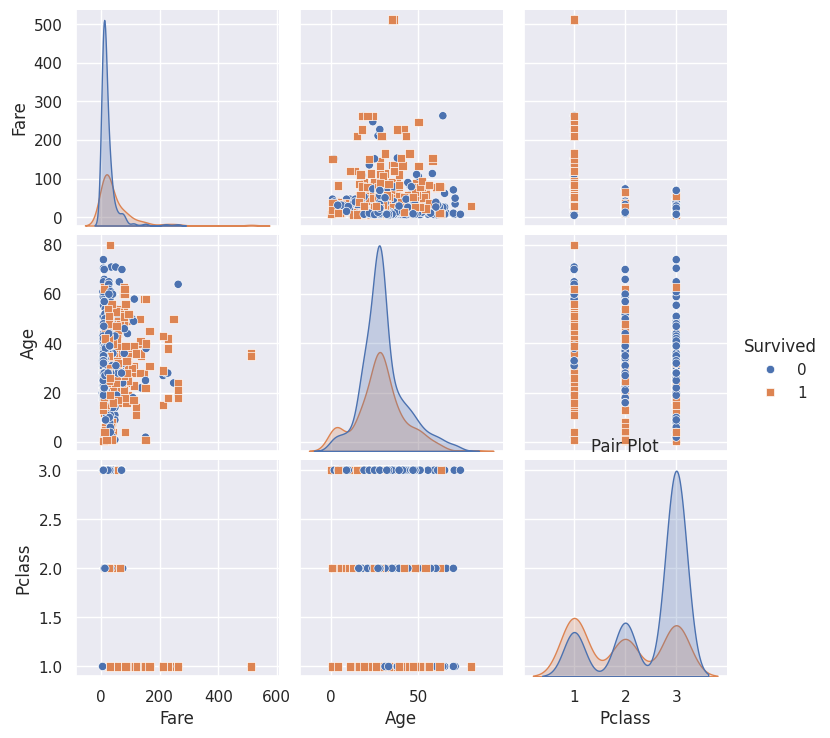

Observing the diagonal elements,

 * More people of Pclass 1 survived than died (First peak of red is higher than blue)
 * More people of Pclass 3 died than survived (Third peak of blue is higher than red)
 * More people of age group 20-40 died than survived.
 * Most of the people paying less fare died.

## 4.12 Calculate the correlation matrix only for numeric columns



Text(0.5, 1.0, 'Correlation between features')

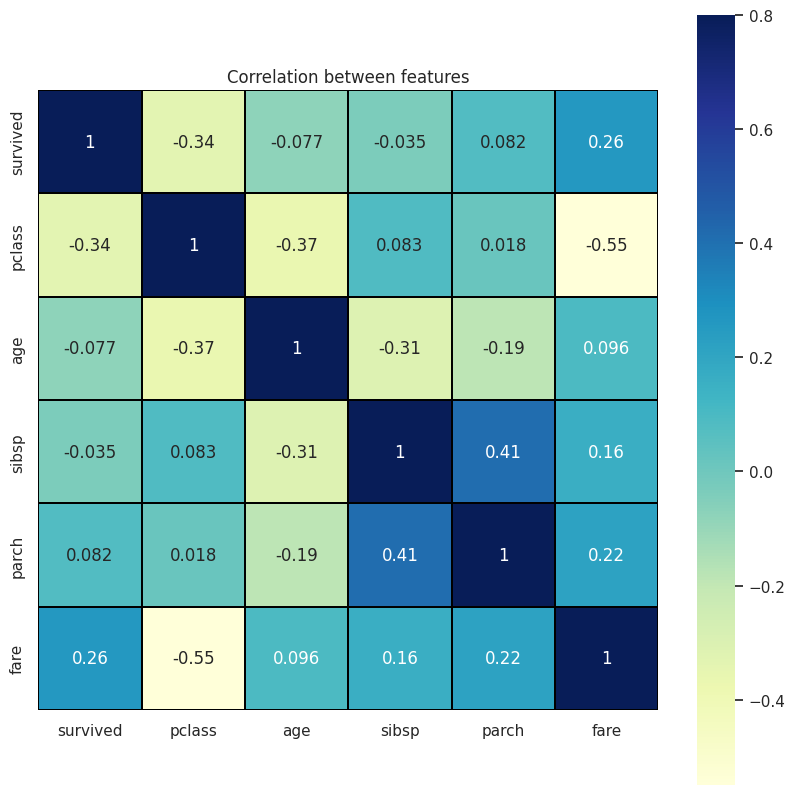

In [137]:
# Calculate the correlation matrix only for numeric columns
corr = data.select_dtypes(include=np.number).corr()

plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidth=.01, square=True, annot=True, cmap='YlGnBu', linecolor='black')
plt.title('Correlation between features')

* Age and Pclass are negatively corelated with Survived.
* FamilySize is made from Parch and SibSb only therefore high positive corelation among them.
* Fare and FamilySize are positively coorelated with Survived.
* With high corelation we face redundancy issues.

 ## 5. Conclusion
* With the help of this notebook we learnt how exploratory data analysis can be carried out using Pandas plotting.
* Also we have seen making use of packages like matplotlib and seaborn to develop better insights about the data.
* We have also seen how preproceesing helps in dealing with missing values and irregualities present in the data. We also learnt how to create new features which will in turn help us to better predict the survival.
* We also make use of pandas profiling feature to generate an html report containing all the information of the various features present in the dataset.
* We have seen the impact of columns like Age, Embarked, Fare, SibSp and Parch on the rate of survival.
* The most important inference drawn from all this analysis is, we get to know what are the features on which survival is highly positively and negatively coorelated with.
* This analysis will help us to choose which machine learning model we can apply to predict survival of test dataset